שמות המגישים:

# מעבדה 2 - תכנות מונחה עצמים והתמרה פרספקטיבית

## הוראות להגשת המעבדה
1.	ההגשה היא בזוגות או ביחידים.
2.	מועד ההגשה הוא שבוע מיום פרסום המעבדה.
3. יש להגיש קובץ html יחיד. 


## חלק א - תכנות מונחה עצמים

### 1. ממשו את המחלקה Shape 
מחלקה היא מחלקת האב המכילה את כל הצורות הגיאומטריות. 
כל צורה גיאומטרית מוגדרת ע"י שמה ופרמטרי משוואתה המתמטית.
-   המחלקה תכיל שדה של שם ,
- הוסיפו את המתודות הבאות כריקות:
    1. שטח
    2. היקף
- ממשו מתודות ההתמרה 
   
   התמרות אלה יקבלו אוסף נקודות ופרמטרי התמרה ויבצעו את ההתמרות הבאות:   
    1. התמרה אוקלידית
    2. התמרה קונפורמית
    3. התמרה אפינית


- ממשו את מתודות ההתמרות ההפוכות 

   התמרות אלה יקבלו אוסף נקודות ופרמטרי התמרה ויבצעו את ההתמרות ההפוכות עבור כל אחת מההתמרות:   
    1. התמרה אוקלידית
    2. התמרה קונפורמית
    3. התמרה אפינית


- ממשו פונקציית ציור המקבלת אוסף נקודות ומציירת אותן 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

In [3]:
class Shape:
    
    def __init__(self, name):
        """
        
        """
        self.__name = name

    
    def area(self):
        print('You called area from Shape')
        pass
        
    def perimeter(self):
        pass
        
    def oklid(self, points, angle, delta):
        """
        :param points: Input array of points
        :param angle: Rotation angle in radians
        :param delta: Shifting of points array
        
        :type points: np.ndarray.type('float')
        :type angle: double
        :type delta: np.ndarray.type('float')
        
        :return: Array of transformed points
        :rtype: np.ndarray.type('float')
        
        """
        
        r = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
        x_new = np.dot(r,points)+np.vstack((delta[0]*np.ones(points.shape[1]),delta[0]*np.ones(points.shape[1])))
        return x_new

    def konform(self, points, angle, delta, scale):
        """
        :param points: Input array of points
        :param angle: Rotation angle in radians
        :param delta: Shifting of points array
        :param scale: Scale on points
        
        :type points: np.ndarray.type('float')
        :type angle: double
        :type delta: np.ndarray.type('float')
        :type scale: np.ndarray.type('float')
        
        :return: Array of transformed points
        :rtype: np.ndarray.type('float')
        
        """

        r = np.dot(scale,np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]))
        print(delta[0]*np.ones(points.shape[1]))
        print(delta[1]*np.ones(points.shape[1]))
        x_new = np.dot(r,points)+np.vstack((delta[0]*np.ones(points.shape[1]),delta[1]*np.ones(points.shape[1])))
        return x_new
    
    def afine(self, points, angle, delta,scale,shear):
        """
        :param points: Input array of points
        :param angle: Rotation angle in radians
        :param delta: Shifting of points array
        :param scale: Scale on points
        :param shear: Shear on specific axis of points
        
        :type points: np.ndarray.type('float')
        :type angle: double
        :type delta: np.ndarray.type('float')
        :type scale: np.ndarray.type('float')
        :type shear: np.ndarray.type('float')
        
        :return: Array of transformed points
        :rtype: np.ndarray.type('float')
        
        """

        r = np.dot(shear,np.dot(scale,np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])))
        x_new = np.dot(r,points)+np.vstack((delta[0]*np.ones(points.shape[1]),delta[1]*np.ones(points.shape[1])))
        return x_new

    def draw(self, points):
        """
        :param points: Array of untransformed points

        :type shear: np.ndarray.type('float')

        """
        plt.plot(points[0,:],points[1,:],'b.')
        plt.axis('equal')
        plt.show

    def multimat(self, angle, scale, shear):
        """
        if none = np.ones
        """
        rotation = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
        return np.dot(shear,np.dot(scale,rotation))
                      
    def invOklid(self, points, angle, delta):
        r = self.multimat(angle)
        x_new = np.dot(la.inv(r),points - np.vstack((delta[0]*np.ones(points.shape[1]),delta[1]*np.ones(points.shape[1]))))
        return x_new

    def invKonform(self, points, angle, delta,scale):
        r = self.multimat(angle,scale)
        x_new = np.dot(la.inv(r),points - np.vstack((delta[0]*np.ones(points.shape[1]),delta[1]*np.ones(points.shape[1]))))
        return x_new

    def invAfine(self, points, angle, delta,scale,shear):
        r = self.multimat(angle, scale, shear)
        x_new = np.dot(la.inv(r),points - np.vstack((delta[0]*np.ones(points.shape[1]),delta[1]*np.ones(points.shape[1]))))
        return x_new

### 2. ממשו את המחלקה Circle.  מחלקה זו תירש ממחלקת האב "Shape".
 מחלקה זו מאותחלת על-ידי קבלה של שם המעגל, מרכזו ורדיוסו. 
 
 ממשו עבור מחלקה זו את המתודות הפרטיות הבאות:
 -	מתודה שמחשבת את שטח של המעגל.  
 -	מתודה שמחשבת את ההיקף של המעגל. 
 
 ממשו את המתודה:
 -	מתודה הבודקת אם נקודה נמצאת בתוך המעגל או מחוצה לו, מחזירה True או False.
 - מתודה המציירת את המעגל. מתודה זו מבצעת override על מתודת הציור של מחלקת האב.
 
ממשו את המאפיינים הבאים: 
- `def center(self)` – מרכז המעגל.
- `def radius(self)` - שטח המעגל


In [4]:
class Circle(Shape):
    
    def __init__(self, name, radius, center):
        """
        :param name:
        :param radius_of_circle:
        :param center_of_circle:
        
        :type name:
        :type radius_of_circle:
        :type center_of_circle:
        
        """
        super().__init__(name)
        
        self.radius = radius
        self.center = center
        
    def area(self):
        """
        
        """
        print('You called area from Circle')
        return np.pi*self.radius**2
    
    def __perimeter(self, radius):
        """
        
        """
        return 2*np.pi*radius
    
    def isInside(self, point):
        """
        
        """
        
        def dis(point1):
            return np.sqrt((point[0]-self.center[0])**2+(point[1]-self.center[1])**2)
        if dis(point) > self.radius:
            return False
        else:
            return True
        
    def drawCircle(self):
        
        circle = plt.Circle((self.center[0], self.center[1]), self.radius, color='b', fill=False)

        fig, ax = plt.subplots()
        ax.add_artist(circle)

        plt.axis('equal')
        plt.show()
    
    """@staticmethod
    def func(x,y, z):
        pass
    
    @classmethod
    def func2(cls, x,y,z):
        pass"""
    
    def generateCirclePoints(self, numberOfPoints):
        """
        
        """
        
        alpha = np.arange(0, 2 * np.pi, 2 * np.pi / numberOfPoints)    
        x = self.center[0]+self.radius * np.cos(alpha)    
        y = self.center[1]+self.radius * np.sin(alpha)

        return np.vstack([x, y])
    
    # @property
    # def center(self):
    #     return self.center
    # 
    # @property
    # def radius(self):
    #     return self.radius
    # 
    # @radius.setter
    # def radius(self, value):
    #     self.center = value
    # 
    # @center.setter
    # def center(self, value):
    #  self.center = value

הוסיפו למחלקה את המתודה `generateCirclePoints(self, numberOfPoint)` 

מתודה זו מקבלת מופע ואת מספר הנקודות הסינטטיות המיוצרות על המעגל

להלן דוגמא למעגל המיוצר סביב ראשית הצירים:


`def generateCircle_origin(r, numberOfPoints)`:

    alpha = np.arange(0, 2 * np.pi, 2 * np.pi / numberOfPoints)    
    x = r * np.cos(alpha)    
    y = r * np.sin(alpha))

    return np.vstack([x, y])

### 3. ממשו את המחלקה Ellipse.  מחלקה זו תירש ממחלקת האב "Shape".
מחלקה זו מאותחלת על-ידי שם האליפסה, הצירים הראשיים שלה, ומיקום מרכזיה.  

ממשו עבור מחלקה זו את המתודות הפרטיות הבאות:  
-	מתודה המחשבת את שטח האליפסה
- מתודה המחשבת את היקף האליפסה

ממשו עבור מחלקה זו את המתודות הבאות:
-	מתודה שמחשבת ומחזירה את פחיסות האליפסה.

     _הערה_: פחיסות (flattening)אליפסה מחושבת על-ידי  
 $$ f=\dfrac{a-b}{a} $$  
 כאשר a הוא הציר הראשי ו-b המשני. 

- מתודה המציירת את האליפסה. מתודה זו מבצעת override על מתודת הציור של מחלקת האב.



ממשו את המאפיינים הבאים: 
-	`def center(self)` – מרכזי האליפסה 
-	`def a(self)` – אורך הציר a 
-	`def b(self)` – אורך הציר b

להזכירכם, משוואת אליפסה מוגדרת על-ידי: 
$$ 
\left(\frac{x-x_0}{a}\right)^2+\left(\frac{y-y_0}{b}\right)^2=1
$$
כאשר $x_0, \, y_0$ הם מיקום מרכזי האליפסה

$$
p \approx 2 \pi \sqrt{\frac{a^{2}+b^{2}}{2}}
$$

In [56]:
class Ellipse(Shape):
    
    def __init__(self, name, a, b, center):
        """
        :param name:
        :param radius:
        :param center:
        
        :type name:
        :type radius:
        :type center:
        
        """
        super().__init__(name)
        
        self.a = a
        self.b = b
        self.center = center
        print("aaaaaaaaaaaaaaaaaaaa")
        
    def __area(self):
        """
        
        """
        return np.pi*self.a*self.b
    
    def __perimeter(self):
        """
        
        """
        return 2*np.pi*np.sqrt((self.a**2+self.b**2)/2)
    
    
    def isInside(self, point):
        """
        
        """
        
        return (self.a-self.b)/2 #Not done
        
    def drawEllipse(self):
        
        t = np.linspace(0, 2*np.pi, 100)
        plt.plot( self.center[0]+self.a*np.cos(t) , self.center[1]+self.b*np.sin(t) )
        plt.axis('equal')   
        plt.show()
    
    def generateEllipsePoints(self, numberOfPoints):
        """
        
        """
        
        alpha = np.arange(0, 2 * np.pi, 2 * np.pi / numberOfPoints)    
        x = self.center[0]+self.a*np.cos(alpha)   
        y = self.center[1]+self.b*np.sin(alpha)

        return np.vstack([x, y])
    print("BBBBB")
    
    # @property
    # def center(self):
    #     return self.center
    # 
    # @property
    # def a(self):
    #     return self.a
    # 
    # @property
    # def b(self):
    #     return self.b
    # 
    # @center.setter
    # def center(self, value):
    #  self.center = value
    #     
    # @a.setter
    # def a(self, value):
    #  self.a = value
    #     
    # @b.setter
    # def b(self, value):
    #  self.b = value
    
    # @staticmethod
    # def func(x,y, z):
    #     pass
    # 
    # @classmethod
    # def func2(cls, x,y,z):
    #     pass

BBBBB


הוסיפו למחלקה את המתודה `generateEllipsePoints(self, numberOfPoint)` 

מתודה זו מקבלת מופע ואת מספר הנקודות הסינטטיות המיוצרות על האליפסה



### 4. צרו מופע של המעגל 
עם שם שתבחרו
ומרכז בנקודה (2,5) ורדיוס של 2


In [57]:
 cir1 = Circle('Circle1',2,[2,5])


הדפיסו את שטח המעגל

In [58]:
print(cir1.area())

You called area from Circle
12.566370614359172



הדפיסו את הרדיוס של המעגל

In [59]:
print(cir1.radius)


2


 התמירו 10 נקודות שעל המעגל על ידי התמרה 
 
שמסובבת ב 30 מעלות ומגדילה פי 2 ומזיזה את המעגל ל-(1,1)



[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


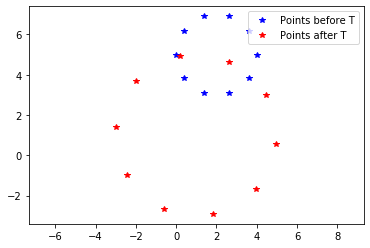

In [60]:
points = cir1.generateCirclePoints(10)
plt.plot(points[0,:],points[1,:],'b*', label='Points before T')
angle = np.radians(30)
delta = np.array([-1,-4])
scale = np.array([[2,0],[0,2]])
t_points = cir1.konform(points, 0, [-2,-5], np.array([[1,0],[0,1]])) # First we move to (0,0)
t_points = cir1.konform(t_points, angle, [1, 1], scale) # Transformation and moving to (1,1)
plt.plot(t_points[0,:],t_points[1,:],'*r', label='Points after T')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

ציירו את המעגל המותמר באמצעות המתודה השייכת למופע

In [61]:
cir2 = Circle('Circle2',np.sqrt((t_points[0,0]-1)**2+(t_points[1,0]-1)**2),[1,1])
print(cir2.radius)


4.000000000000001


הפעילו התמרה הפוכה על מנת לקבל את המעגל המקורי

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]


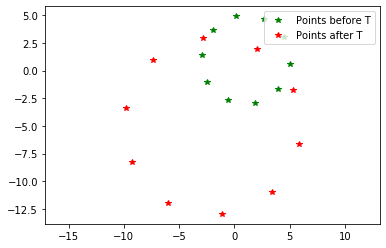

In [62]:
plt.plot(t_points[0,:],t_points[1,:],'g*', label='Points before T')
angle = np.radians(30)
scale = np.array([[2,0],[0,2]])
t_points2 = cir1.konform(t_points, 0, [-1,-1], np.array([[1,0],[0,1]])) # First we move to (0,0)
t_points2 = cir1.konform(t_points2, angle, [-2, -5], scale) # Transformation and moving to (1,1)
plt.plot(t_points2[0,:],t_points2[1,:],'r*', label='Points after T')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()


האם הנקודה (0.5,0.5) בתוך המעגל או מחוצה לו? 


In [63]:
if not cir1.isInside([0.5,0.5]):
    print('The point isnt inside the Circle R=2, (2,5)')
else:
    print('The point is inside the Circle R=2, (2,5)')
    

The point isnt inside the Circle R=2, (2,5)


### 5.  צרו מופע של האליפסה
עם שם לבחירתכם 

a=3 , b=1

מרכז ב-(3-, 2-)





In [64]:
elip1 = Ellipse('Ellip1', 3, 1, [2,-3])

aaaaaaaaaaaaaaaaaaaa



מהי הפחיסות של האליפסה?

In [65]:
f = (elip1.a-elip1.b)/elip1.a
print(f)

0.6666666666666666


צרו 15 נקודות על האליפסה וציירו

In [84]:
points = elip1.generateEllipsePoints(15)

העבירו את האליפסה למערכת קוארדינטות אחרת, כך שהצירים לא אורתוגונלים. ציר Y מוטה ב-30 מעלות, וכל המערכת מסובבת ב90 מעלות. 
מעבר לכך, המערכת החדשה קטנה פי 2 מהמערכת המקורית. 
points

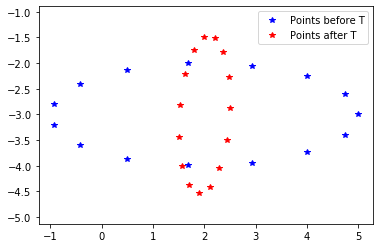

In [85]:
plt.plot(points[0,:],points[1,:],'b*', label='Points before T')
angle = np.radians(90)
scale = np.array([[0.5,0],[0,0.5]])
shear = [[1,0],[np.tan(np.radians(30)), 1]]
t_points = elip1.afine(points, 0, [-2,3], np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])) # First we move to (0,0)
t_points = elip1.afine(t_points, angle, [2, -3], scale, shear) # Transformation and moving to (1,1)
plt.plot(t_points[0,:],t_points[1,:],'*r', label='Points after T')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()



ציירו את האליפסה במערכת החדשה באמצעות המתודה השייכת למופע

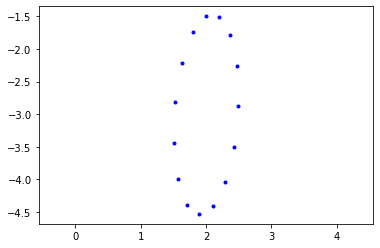

In [86]:
elip1.draw(t_points)

העבירו חזרה את האליפסה במערכת החדשה לישנה, השוו בין התוצאות

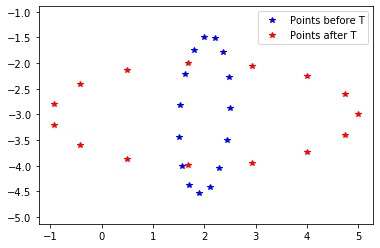

In [95]:
plt.plot(t_points[0,:],t_points[1,:],'b*', label='Points before T')
angle = np.radians(90)
scale = np.array([[0.5,0],[0,0.5]])
shear = [[1,0],[np.tan(np.radians(30)), 1]]
t_points2 = elip1.afine(t_points, 0, [-2, 3], np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])) # First we move to (0,0)
t_points2 = elip1.invAfine(t_points2, angle, [0, 0], scale, shear) # Transformation
t_points2 = elip1.afine(t_points2, 0, [2, -3], np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])) # We move to (2,-3)
plt.plot(t_points2[0,:],t_points2[1,:],'*r', label='Points after T')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()


## חלק ב - התמרה פרספקטיבית

הריצו את הפקודות הבאות

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

התמרה פרספקטיבית מוגדרת על-ידי אורך המוקד f, ומשוואתה:
$$
    z=f \cdot \frac{Z}{X}
$$



בנו פונקציה המבצעת התמרה פרספקטיבית
פונקציה זו תקבל את פרמטר ההתמרה f ואוסף נקודות, ותחזיר אותן לאחר התמרה

### 1. נתון סט הנקודות הבא:



In [14]:
XZ=np.array([[6,6,7,7,9,9,25,25],
             [0.0001,-0.0001,0.0001,-0.0001,0.0001,-0.0001,0.0001,-0.0001]])


שרטטו את סט הנקודות כך שכל שתי נקודות מתארות עמוד נפרד

מה ניתן לומר על העמודים? האם כולם באותו האורך? 

נתון קוד המשרטט מצלמה חד ממדית בעלת אורך מוקד של 5 פיקסלים וגודל חיישן של 0.00015 פיקסלים באופן סכמטי: 


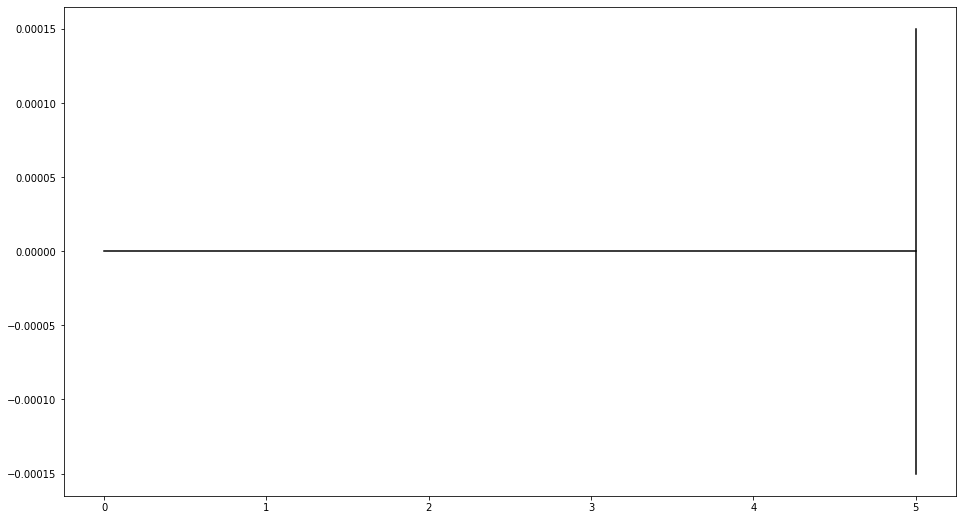

In [15]:
f=5 # focal length
s=0.00015 # sensor size
plt.figure(figsize=(16,9)) #  figure size
plt.plot([f,f],[-s,s],"k-")
plt.plot([f,0],[0,0],"k-")


השתמשו בקוד המשרטט את העמודים וציירו את המצלמה והעמודים

חברו קו בין המרכז הפרספקטיבי של המצלמה לבין כל נקודה של עמוד

- המרכז הפרספקטיבי יושב בראשית
- השתמשו ברשימת הצבעים הבאה בשרטוט הקווים 

`colors=['b-','b-','g-','g-','r-','r-','m-','m-']`


התמירו את נקודות העמודים באמצעות פונקציית ההתמרה הפרספקטיבית

הוסיפו לציור את הנקודות המותמרות (שרטטו כנקודות) 

תארו את הציור. מה ניתן לומר שההתמרה הפרספקטיבית עושה? מה הקשר בין העמודים, לנקודות שהותמרו ולמרכז הפרספקטיבי?

חשבו את המרחק בין כל שתי נקודות מותמרות השייכות לכל אחד מהעמודים

האם לדעתכם יש קשר בין מרחק העמוד מהמצלמה לבין המרחק המותמר? אם כן, מהו?

### 2. נתונים שני קווים

In [16]:
l1=np.array([[60,70,100,120,200,220,250,280],
             [0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002]])
l2=np.array([[60,70,100,120,200,220,250,280],
             [-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002]])

שרטטו את הנקודות של כל קו וחברו ביניהן בקו כחול



מהו היחס הגיאומטרי בין הקווים?

קווים אלו צולמו באמצעות מצלמה חד-ממדית בעלת אורך מוקד של 10 פיקסלים גודל חיישן 0.00001. מהן הקואורדינטות של הנקודות לאחר ההתמרה?

ציירו את הקרניים המקשרות בין הנקודות לבין המצלמה


_ניתן להשתמש בקוד ציור המצלמה מהסעיפים הקודמים_

האם יש קשר בין הנקודות על כל אחד מהקווים לבין ההטלה שלהם על מישור התצלום? 

התמירו עוד שתי נקודות, הנמצאות על כל אחד מהקווים במרחקים של $x=3800$ ו-$x=4000$ 

מה ניתן לומר שהתמרה פרספקטיבית עושה לקווים מקבילים?

מה הוא המקום הגיאומטרי של הקווים לאחר ההתמרה?